<div align="center">

# Pracownia nr 3

<div>

## Zadanie 1

![Zadanie nr 1](images/zadanie_1.png)

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("advertising.csv")

# Wyznacz progi (33% i 66%)
q1 = data["Sales"].quantile(0.33)
q2 = data["Sales"].quantile(0.66)

print(q1)
print(q2)

# Utwórz nową kolumnę
data["Sales Class"] = pd.cut(
    data["Sales"],
    bins=[-float("inf"), q1, q2, float("inf")],
    labels=["low", "mid", "high"]
)

print(data.head())

X = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales Class']]

12.0
17.434
      TV  Radio  Newspaper  Sales Sales Class
0  230.1   37.8       69.2   22.1        high
1   44.5   39.3       45.1   10.4         low
2   17.2   45.9       69.3   12.0         low
3  151.5   41.3       58.5   16.5         mid
4  180.8   10.8       58.4   17.9        high


In [2]:
import plotly.express as px

fig = px.scatter_3d(
    data_frame=data,
    x='TV',
    y='Radio',
    z='Newspaper',
    color='Sales Class',
    color_discrete_map={
        'low': 'rgb(100, 190, 50)', 
        'mid': 'rgb(250, 160, 50)',
        'high': 'rgb(235, 50, 50)',
    },
    category_orders={'Sales Class': ['high', 'mid', 'low']},
    title='Dane 3D'
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title='TV', backgroundcolor='black', gridcolor='#222', zerolinecolor='#444', color='white'),
        yaxis=dict(title='Radio', backgroundcolor='black', gridcolor='#222', zerolinecolor='#444', color='white'),
        zaxis=dict(title='Newspaper',  backgroundcolor='black', gridcolor='#222', zerolinecolor='#444', color='white'),
        bgcolor='black'
    ),
    width=1300,
    height=725,
    paper_bgcolor='black',
    font_color='white',
    title_x=0.5
)

fig.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=87,
    shuffle=True,
)

KNN bez skalowania

Accuracy: 0.7

Classification report:
               precision    recall  f1-score   support

        high       0.38      0.83      0.53         6
         low       0.85      1.00      0.92        17
         mid       0.86      0.35      0.50        17

    accuracy                           0.70        40
   macro avg       0.70      0.73      0.65        40
weighted avg       0.78      0.70      0.68        40


Confusion matrix:
 [[ 5  0  1]
 [ 0 17  0]
 [ 8  3  6]]


/Users/piotrpijanowski/Documents/Studia/Semestr 5/uczenie_maszynowe/lista_4/.venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



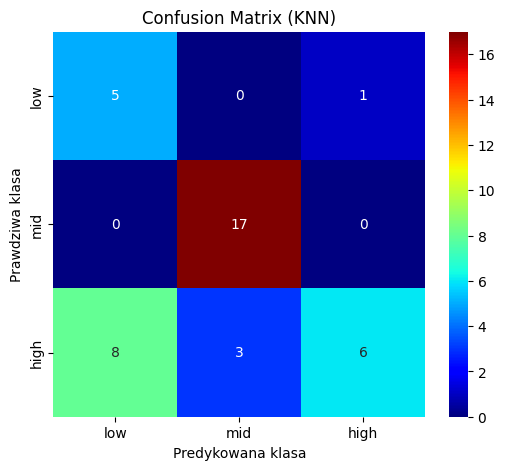

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Utwórz wykres
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,        # wyświetl liczby
    fmt='d',           # liczby całkowite
    cmap='jet',      # kolorystyka
    xticklabels=['low', 'mid', 'high'],  # etykiety osi X
    yticklabels=['low', 'mid', 'high']   # etykiety osi Y
)

plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predykowana klasa")
plt.ylabel("Prawdziwa klasa")
plt.show()

Knn ze skalowaniem


Accuracy: 0.7

Classification report:
               precision    recall  f1-score   support

        high       0.44      0.67      0.53         6
         low       0.80      0.94      0.86        17
         mid       0.73      0.47      0.57        17

    accuracy                           0.70        40
   macro avg       0.66      0.69      0.66        40
weighted avg       0.72      0.70      0.69        40


Confusion matrix:
 [[ 4  0  2]
 [ 0 16  1]
 [ 5  4  8]]


/Users/piotrpijanowski/Documents/Studia/Semestr 5/uczenie_maszynowe/lista_4/.venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



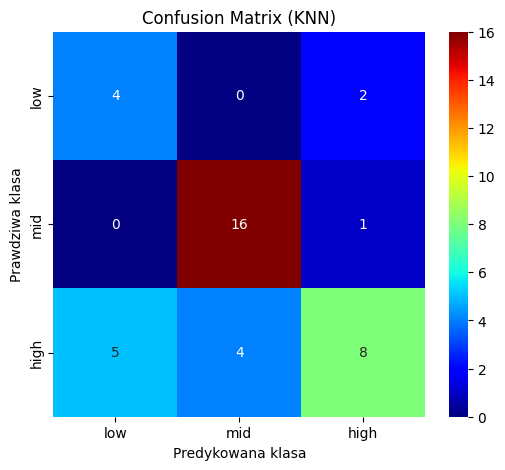

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Utwórz wykres
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,        # wyświetl liczby
    fmt='d',           # liczby całkowite
    cmap='jet',      # kolorystyka
    xticklabels=['low', 'mid', 'high'],  # etykiety osi X
    yticklabels=['low', 'mid', 'high']   # etykiety osi Y
)

plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predykowana klasa")
plt.ylabel("Prawdziwa klasa")
plt.show()

## Zadanie 2

![Zadanie nr 2](images/zadanie_2.png)

In [6]:
import pandas as pd

data = pd.read_csv('bank.csv')

X = data.drop("deposit", axis=1)
y = data["deposit"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

categorical = X.select_dtypes(include=["object"]).columns
numerical = X.select_dtypes(exclude=["object"]).columns

# 5. Przetwarzanie danych
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ]
)

# 6. Tworzymy pipeline z regresją logistyczną
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# 7. Trening modelu
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

thresholds = [0.1, 0.25, 0.5, 0.75, 0.9]

results = []

for t in thresholds:
    y_pred = np.where(y_proba >= t, "yes", "no")
    results.append({
        "threshold": t,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, pos_label="yes"),
        "recall": recall_score(y_test, y_pred, pos_label="yes"),
        "f1": f1_score(y_test, y_pred, pos_label="yes"),
    })

results_df = pd.DataFrame(results)
print(results_df)

   threshold  accuracy  precision    recall        f1
0       0.10  0.641290   0.569497  0.995274  0.724458
1       0.25  0.801612   0.719486  0.952741  0.819845
2       0.50  0.825347   0.827451  0.797732  0.812320
3       0.75  0.766234   0.887283  0.580340  0.701714
4       0.90  0.677116   0.918114  0.349716  0.506502


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix

thresholds = np.linspace(0, 1, 101)

results = []

for t in thresholds:
    y_pred = np.where(y_proba >= t, 'yes', 'no')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=["no", "yes"]).ravel()

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    results.append({"threshold": t, "TPR": tpr, "FPR": fpr})
    
results_df = pd.DataFrame(results)
print(results_df)

     threshold       TPR       FPR
0         0.00  1.000000  1.000000
1         0.01  1.000000  0.997447
2         0.02  1.000000  0.973617
3         0.03  0.999055  0.935319
4         0.04  0.999055  0.891064
..         ...       ...       ...
96        0.96  0.208885  0.014468
97        0.97  0.184310  0.011064
98        0.98  0.142722  0.006809
99        0.99  0.087902  0.003404
100       1.00  0.000000  0.000000

[101 rows x 3 columns]


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.express as px

fig = px.line(results_df,
    x="FPR",
    y="TPR",
    title='ROC function',
)

fig.update_traces(line=dict(color="red", width=2))

fig.add_shape(
    type="line",
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color="blue", width=2, dash="dash"),
    name="Random Classifier"
)

fig.update_layout(
    width=1300,
    height=725,
    title_x=0.5,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()


fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label="yes")
roc_auc = roc_auc_score(y_test, y_proba)


print("FPR:", fpr[:10])
print("TPR:", tpr[:10])
print("Progi:", thresholds[:10])
print('Accuracy', roc_auc)

FPR: [0.         0.         0.         0.00085106 0.00085106 0.00170213
 0.00170213 0.00255319 0.00255319 0.00340426]
TPR: [0.         0.00094518 0.0047259  0.0047259  0.04442344 0.04442344
 0.06616257 0.06616257 0.0879017  0.0879017 ]
Progi: [       inf 0.99999999 0.99993384 0.99992601 0.99633603 0.99601445
 0.99346345 0.99333186 0.99024927 0.99014543]
Accuracy 0.907296786389414


In [12]:

thresholds = np.linspace(0, 1, 101)

def cost_function(false_positive, false_negative):
    return (10 * false_positive) + (3 * false_negative)

best_treshold = thresholds[0]
cost = np.inf

for t in thresholds:
    y_pred = np.where(y_proba >= t, 'yes', 'no')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=["no", "yes"]).ravel()

    if cost_function(fp, fn) < cost:
        cost = cost_function(fp, fn)
        best_treshold = t

print(cost)
print(best_treshold)

2109
0.74


## Zadanie 3

![Zadanie nr 3](images/zadanie_3_1.png)
![Zadanie nr 3](images/zadanie_3_2.png)

## Zadanie 4

![Zadanie nr 4](images/zadanie_4.png)

In [13]:
import pandas as pd

data = pd.read_csv('adult.csv')

data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [14]:
import statsmodels.api as sm

data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Usunięcie braków
data = data.replace('?', pd.NA).dropna()

# Zmienna zależna
data['income'] = data['income'].map({'<=50K': 1, '>50K': 0})

# Zmienne niezależne (bez targetu)
X = data.drop('income', axis=1)

# One-hot encoding (z usunięciem jednej kolumny referencyjnej)
X = pd.get_dummies(X, drop_first=True)

# Dodanie wyrazu wolnego (interceptu)
X = sm.add_constant(X)

y = data['income']

/var/folders/vl/g2_dzxfn18zcfpxm0wy_cl180000gn/T/ipykernel_85732/1620430012.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=63, stratify=y
)

In [16]:
def stepwise_selection(X, y, criterion='AIC'):
    included = []  # zmienne w modelu
    best_criterion_value = float('inf')
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included) - {'const'})
        new_criterion_values = {}

        # Testujemy każdą nieużywaną zmienną
        for new_col in excluded:
            try:
                model = sm.Logit(y, X[included + [new_col] + ['const']]).fit(disp=False)
                crit_value = model.aic if criterion == 'AIC' else model.bic
                new_criterion_values[new_col] = crit_value
            except:
                continue

        if not new_criterion_values:
            break

        # Wybieramy najlepszą nową zmienną
        best_new_var = min(new_criterion_values, key=new_criterion_values.get)
        best_new_value = new_criterion_values[best_new_var]

        # Sprawdzamy, czy poprawia jakość (mniejsze AIC/BIC)
        if best_new_value < best_criterion_value:
            included.append(best_new_var)
            best_criterion_value = best_new_value
            changed = True
            print(f"✔ Dodano {best_new_var}, {criterion} = {best_new_value:.2f}")
        if not changed:
            break
    return included

In [17]:
selected_vars = stepwise_selection(X, y, criterion='BIC')
print("\nWybrane zmienne:", selected_vars)

✔ Dodano education.num, BIC = 30129.85
✔ Dodano capital.gain, BIC = 27744.39
✔ Dodano age, BIC = 26436.95
✔ Dodano hours.per.week, BIC = 25542.88
✔ Dodano capital.loss, BIC = 25115.64
✔ Dodano fnlwgt, BIC = 25110.46

Wybrane zmienne: ['education.num', 'capital.gain', 'age', 'hours.per.week', 'capital.loss', 'fnlwgt']


In [18]:
final_model = sm.Logit(y, X[selected_vars + ['const']]).fit()
print(final_model.summary())

Optimization terminated successfully.
         Current function value: 0.415063
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                30162
Model:                          Logit   Df Residuals:                    30155
Method:                           MLE   Df Model:                            6
Date:                Tue, 04 Nov 2025   Pseudo R-squ.:                  0.2603
Time:                        03:50:06   Log-Likelihood:                -12519.
converged:                       True   LL-Null:                       -16925.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
education.num     -0.3223      0.007    -45.663      0.000      -0.336      -0.308
capital.gain     

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pred_probs = final_model.predict(X[selected_vars + ['const']])
pred_classes = (pred_probs > 0.5).astype(int)

print("\nAccuracy:", accuracy_score(y, pred_classes))
print("\nMacierz pomyłek:\n", confusion_matrix(y, pred_classes))
print("\nRaport klasyfikacji:\n", classification_report(y, pred_classes))



Accuracy: 0.8098269345534116

Macierz pomyłek:
 [[ 3003  4505]
 [ 1231 21423]]

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.71      0.40      0.51      7508
           1       0.83      0.95      0.88     22654

    accuracy                           0.81     30162
   macro avg       0.77      0.67      0.70     30162
weighted avg       0.80      0.81      0.79     30162



## Zadanie 5

![Zadanie nr 5](images/zadanie_5.png)

In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("Titanic Dataset.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [21]:
# braki - pierwszy podpunkt
missing_percent = df.isnull().mean() * 100
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'MissingPercent']
missing_df = missing_df.sort_values('MissingPercent', ascending=False)


fig = px.bar(
    missing_df,
    x='Column',
    y='MissingPercent',
    title='Odsetek brakujących wartości w kolumnach',
    text=missing_df['MissingPercent'].apply(lambda x: f'{x:.1f}%'),
    color='MissingPercent',
    color_continuous_scale='RdBu_r'
)
fig.update_traces(textposition='outside')
fig.show()


In [22]:
#drugi podpunkt - zależności
categorical = df.select_dtypes(include=['object', 'category']).columns
numerical = df.select_dtypes(include=['number']).columns

for num_col in numerical:
    if df[num_col].isnull().sum() > 0:
        df[f'{num_col}_missing'] = df[num_col].isnull().astype(int)
        print(f"\n=== Braki w kolumnie: {num_col} ===\n")
        for cat_col in categorical:
            summary = (
                df.groupby(cat_col)[f'{num_col}_missing']
                .mean()
                .mul(100)
                .reset_index()
                .rename(columns={f'{num_col}_missing': 'PercentMissing'})
                .sort_values('PercentMissing', ascending=False)
            )
            print(f"\nZależność od zmiennej kategorycznej: {cat_col}")
            display(summary)



=== Braki w kolumnie: age ===


Zależność od zmiennej kategorycznej: name


,name,PercentMissing
1306,"van Melkebeke, Mr. Philemon",100.0
578,"Ivanoff, Mr. Kanio",100.0
845,"Nasr, Mr. Mustafa",100.0
1072,"Scanlan, Mr. James",100.0
514,"Hawksford, Mr. Walter James",100.0
...,...,...
445,"Givard, Mr. Hans Kristensen",0.0
444,"Gilnagh, Miss. Katherine ""Katie""",0.0
443,"Gillespie, Mr. William Henry",0.0
442,"Gill, Mr. John William",0.0



Zależność od zmiennej kategorycznej: sex


,sex,PercentMissing
1,male,21.945433
0,female,16.738197



Zależność od zmiennej kategorycznej: ticket


,ticket,PercentMissing
726,A/5 2817,100.0
295,2700,100.0
670,394140,100.0
671,4133,100.0
680,65303,100.0
...,...,...
347,315083,0.0
348,315084,0.0
349,315085,0.0
350,315086,0.0



Zależność od zmiennej kategorycznej: cabin


,cabin,PercentMissing
22,B102,100.0
13,A32,100.0
2,A14,100.0
137,D45,100.0
130,D34,100.0
...,...,...
66,C110,0.0
67,C111,0.0
68,C116,0.0
69,C118,0.0



Zależność od zmiennej kategorycznej: embarked


,embarked,PercentMissing
1,Q,59.349593
0,C,21.481481
2,S,14.442013



Zależność od zmiennej kategorycznej: boat


,boat,PercentMissing
9,15 16,100.000000
10,16,56.521739
15,5 7,50.000000
26,D,35.000000
24,C,26.315789
23,B,22.222222
4,13,20.512821
0,1,20.000000
22,A,18.181818
17,6,15.000000



Zależność od zmiennej kategorycznej: home.dest


,home.dest,PercentMissing
254,"Paris / New York, NY",100.0
22,Belfast,100.0
39,"Brighton, MA",100.0
38,"Bridgwater, Somerset, England",100.0
220,"Manchester, England",100.0
...,...,...
122,"Fond du Lac, WI",0.0
121,"Folkstone, Kent / New York, NY",0.0
120,"Finland Sudbury, ON",0.0
119,"Finland / Washington, DC",0.0



=== Braki w kolumnie: fare ===


Zależność od zmiennej kategorycznej: name


,name,PercentMissing
1146,"Storey, Mr. Thomas",100.0
0,"Abbing, Mr. Anthony",0.0
868,"Nirva, Mr. Iisakki Antino Aijo",0.0
876,"Nysveen, Mr. Johan Hansen",0.0
875,"Nysten, Miss. Anna Sofia",0.0
...,...,...
434,"Gibson, Miss. Dorothy Winifred",0.0
433,"Gheorgheff, Mr. Stanio",0.0
432,"Geiger, Miss. Amalie",0.0
431,"Gee, Mr. Arthur H",0.0



Zależność od zmiennej kategorycznej: sex


,sex,PercentMissing
1,male,0.118624
0,female,0.000000



Zależność od zmiennej kategorycznej: ticket


,ticket,PercentMissing
631,3701,100.0
0,110152,0.0
624,368703,0.0
612,367230,0.0
613,367231,0.0
...,...,...
314,28665,0.0
315,28666,0.0
316,29011,0.0
317,2908,0.0



Zależność od zmiennej kategorycznej: cabin


,cabin,PercentMissing
0,A10,0.0
127,D28,0.0
118,D10 D12,0.0
119,D11,0.0
120,D15,0.0
...,...,...
64,C105,0.0
65,C106,0.0
66,C110,0.0
67,C111,0.0



Zależność od zmiennej kategorycznej: embarked


,embarked,PercentMissing
2,S,0.109409
0,C,0.000000
1,Q,0.000000



Zależność od zmiennej kategorycznej: boat


,boat,PercentMissing
0,1,0.0
14,5,0.0
25,C D,0.0
24,C,0.0
23,B,0.0
22,A,0.0
21,9,0.0
20,8 10,0.0
19,8,0.0
18,7,0.0



Zależność od zmiennej kategorycznej: home.dest


,home.dest,PercentMissing
0,"?Havana, Cuba",0.0
243,"Nice, France",0.0
252,"Ottawa, ON",0.0
251,"Oslo, Norway Cameron, WI",0.0
250,"Oslo, Norway Bayonne, NJ",0.0
...,...,...
121,"Folkstone, Kent / New York, NY",0.0
120,"Finland Sudbury, ON",0.0
119,"Finland / Washington, DC",0.0
118,"Finland / Minneapolis, MN",0.0



=== Braki w kolumnie: body ===


Zależność od zmiennej kategorycznej: name


,name,PercentMissing
0,"Abbing, Mr. Anthony",100.0
847,"Nasser, Mrs. Nicholas (Adele Achem)",100.0
855,"Newell, Miss. Madeleine",100.0
854,"Nesson, Mr. Israel",100.0
853,"Nenkoff, Mr. Christo",100.0
...,...,...
767,"McCarthy, Mr. Timothy J",0.0
765,"McCaffry, Mr. Thomas Francis",0.0
491,"Hansen, Mr. Henry Damsgaard",0.0
153,"Brandeis, Mr. Emil",0.0



Zależność od zmiennej kategorycznej: sex


,sex,PercentMissing
0,female,98.283262
1,male,86.595492



Zależność od zmiennej kategorycznej: ticket


,ticket,PercentMissing
0,110152,100.0
601,364859,100.0
589,364500,100.0
590,364506,100.0
591,364511,100.0
...,...,...
164,237216,0.0
479,348121,0.0
745,C 7076,0.0
481,348123,0.0



Zależność od zmiennej kategorycznej: cabin


,cabin,PercentMissing
0,A10,100.0
110,C90,100.0
113,C93,100.0
114,C95,100.0
115,C97,100.0
...,...,...
158,E38,0.0
169,E63,0.0
20,B10,0.0
136,D43,0.0



Zależność od zmiennej kategorycznej: embarked


,embarked,PercentMissing
1,Q,94.308943
0,C,90.740741
2,S,90.262582



Zależność od zmiennej kategorycznej: boat


,boat,PercentMissing
0,1,100.0
14,5,100.0
25,C D,100.0
24,C,100.0
23,B,100.0
22,A,100.0
21,9,100.0
20,8 10,100.0
19,8,100.0
18,7,100.0



Zależność od zmiennej kategorycznej: home.dest


,home.dest,PercentMissing
184,"Kontiolahti, Finland / Detroit, MI",100.0
239,"New York, NY / Greenwich CT",100.0
237,"New York, NY / Stamford CT",100.0
235,"New Forest, England",100.0
234,"New Britain, CT",100.0
...,...,...
145,"Haddenfield, NJ",0.0
288,"Seattle, WA / Toledo, OH",0.0
64,"Clevedon, England",0.0
46,"Bronx, NY",0.0


In [23]:
#baseline rozwiązanie - podpunkt 3
baseline_df = df.copy()

#wywalamy pustawe kolumny
baseline_df = baseline_df.drop(columns=['body', 'cabin', 'boat'])

# średnia w miejsce nulli
for col in baseline_df.select_dtypes(include=[np.number]).columns:
    baseline_df[col].fillna(baseline_df[col].mean(), inplace=True)

for col in baseline_df.select_dtypes(include=['object']).columns:
    baseline_df[col].fillna(baseline_df[col].mode()[0], inplace=True)


/var/folders/vl/g2_dzxfn18zcfpxm0wy_cl180000gn/T/ipykernel_85732/1928386608.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/vl/g2_dzxfn18zcfpxm0wy_cl180000gn/T/ipykernel_85732/1928386608.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [24]:
advanced_df = df.copy()

# Zmienna informująca o braku kabiny
advanced_df['cabin_missing'] = advanced_df['cabin'].isnull().astype(int)

# Ekstrakcja tytułów z imion
advanced_df['title'] = advanced_df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
rare_titles = advanced_df['title'].value_counts()[advanced_df['title'].value_counts() < 5].index
advanced_df['title'] = advanced_df['title'].replace(rare_titles, 'other')

# Uzupełnianie wieku medianą wg tytułu
advanced_df['age'] = advanced_df.groupby('title')['age'].transform(lambda x: x.fillna(x.median()))

# Uzupełnianie pozostałych braków
for col in advanced_df.select_dtypes(include=[np.number]).columns:
    advanced_df[col].fillna(advanced_df[col].mean(), inplace=True)

for col in advanced_df.select_dtypes(include=['object']).columns:
    advanced_df[col].fillna(advanced_df[col].mode()[0], inplace=True)


<>:7: SyntaxWarning:

invalid escape sequence '\.'

<>:7: SyntaxWarning:

invalid escape sequence '\.'

/var/folders/vl/g2_dzxfn18zcfpxm0wy_cl180000gn/T/ipykernel_85732/2664890068.py:7: SyntaxWarning:

invalid escape sequence '\.'

/var/folders/vl/g2_dzxfn18zcfpxm0wy_cl180000gn/T/ipykernel_85732/2664890068.py:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/vl/g2_dzxfn18zcfpxm0wy_cl180000gn/T/ipykernel_85732/2664890068.py:19: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through c

In [25]:
def prepare_data_for_model(df):
    model_df = df.copy()
    y = model_df['survived']
    X = model_df.drop(columns=['survived', 'name', 'ticket'])
    X = pd.get_dummies(X, drop_first=True)
    return X, y

X_base, y_base = prepare_data_for_model(baseline_df)
X_adv, y_adv = prepare_data_for_model(advanced_df)


In [26]:
def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    return acc, report

acc_base, report_base = evaluate_model(X_base, y_base)
acc_adv, report_adv = evaluate_model(X_adv, y_adv)


In [27]:
results = pd.DataFrame({
    'Model': ['Baseline', 'Advanced'],
    'Accuracy': [acc_base, acc_adv]
})

fig = px.bar(
    results,
    x='Model',
    y='Accuracy',
    text=results['Accuracy'].apply(lambda x: f'{x:.3f}'),
    title='Porównanie dokładności modeli logistycznych',
    color='Model',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_traces(textposition='outside')
fig.update_layout(yaxis_range=[0,1])
fig.show()
